In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objs as go
import plotly.express as px
import dash
from dash import html
from dash import dcc


***DATAFRAMES***

In [54]:
df_covid = pd.read_csv('Data/covid-data.csv', delimiter=',')
df_eco_covid = pd.read_csv('Data/data_econo_covid.csv', delimiter=';')
df_education = pd.read_csv('Data/Education-GDP.csv', delimiter=',')
df_GDP = pd.read_csv('Data/GDP.csv', delimiter=',')
df_gini = pd.read_csv('Data/gini.csv', delimiter=',')
df_poverty = pd.read_csv('Data/poverty-explorer.csv', delimiter=',')
df_trade = pd.read_csv('Data/trade.csv', delimiter=',')
df_HICP_FR = pd.read_csv('Data/HICP_FR.csv', delimiter=',') #The Harmonized Consumer Price Index (HICP) provides a standardized measure of inflation across EU countries. 
df_HICP_BE = pd.read_csv('Data/HICP_BE.csv', delimiter=',')
df_HICP_BU_21 = pd.read_csv('Data/HICP_BU_21.csv', delimiter=',')
df_HICP_FI = pd.read_csv('Data/HICP_FI.csv', delimiter=',')
df_HICP_food_europe = pd.read_csv('Data/HICP_food_europe.csv', delimiter=',')
df_HICP_GR = pd.read_csv('Data/HICP_GR.csv', delimiter=',')
df_HICP_nrj_BU = pd.read_csv('Data/HICP_nrj_BU.csv', delimiter=',')
df_HICP_nrj_GE = pd.read_csv('Data/HICP_nrj_GE.csv', delimiter=',')
df_HICP_nrj_GR = pd.read_csv('Data/HICP_nrj_GR.csv', delimiter=',')
df_HICP_nrj_IT = pd.read_csv('Data/HICP_nrj_IT.csv', delimiter=',')

**Exploration df_covid**

In [55]:
df_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384463,ZWE,Africa,Zimbabwe,2024-03-01,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
384464,ZWE,Africa,Zimbabwe,2024-03-02,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
384465,ZWE,Africa,Zimbabwe,2024-03-03,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
384466,ZWE,Africa,Zimbabwe,2024-03-04,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


Almost all countries have more than 1500 rows in the df_covid table:

In [56]:
df_covid['iso_code'].value_counts().sort_values(ascending=False).head()

iso_code
MEX    1526
ARG    1526
AUT    1524
VGB    1524
BRA    1524
Name: count, dtype: int64

In [57]:
df_covid['iso_code'].value_counts().sort_values(ascending=True).head(10)

iso_code
ESH            1
OWID_CYN     691
MAC          795
OWID_WLS    1198
OWID_SCT    1305
TWN         1348
OWID_ENG    1359
OWID_NIR    1372
HKG         1491
AUS         1524
Name: count, dtype: int64

In [58]:
#Removing countries with less than 1524 values:

print("Before removal:")
print(df_covid['iso_code'].value_counts(ascending=True))

countries_to_remove = ['ESH', 'OWID_CYN', 'MAC', 'OWID_WLS', 'OWID_SCT', 'TWN', 'OWID_ENG', 'OWID_NIR', 'HKG']

df_covid = df_covid[~df_covid['iso_code'].isin(countries_to_remove)]

print("\nAfter removal:")
print(df_covid['iso_code'].value_counts(ascending=True))

Before removal:
iso_code
ESH            1
OWID_CYN     691
MAC          795
OWID_WLS    1198
OWID_SCT    1305
            ... 
DEU         1524
GEO         1524
GRL         1524
ARG         1526
MEX         1526
Name: count, Length: 255, dtype: int64

After removal:
iso_code
AFG         1524
NER         1524
NGA         1524
NIU         1524
OWID_NAM    1524
            ... 
GTM         1524
PYF         1524
ZWE         1524
MEX         1526
ARG         1526
Name: count, Length: 246, dtype: int64


Pre-selection of rows and columns:

In [59]:
df_covid_europe = df_covid[df_covid['continent'] == 'Europe']
df_covid_europe


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
3048,ALB,Europe,Albania,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
3049,ALB,Europe,Albania,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
3050,ALB,Europe,Albania,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
3051,ALB,Europe,Albania,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
3052,ALB,Europe,Albania,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372596,VAT,Europe,Vatican,2024-03-01,26.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,75.12,NaN,808.0,NaN,NaN,NaN,NaN
372597,VAT,Europe,Vatican,2024-03-02,26.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,75.12,NaN,808.0,NaN,NaN,NaN,NaN
372598,VAT,Europe,Vatican,2024-03-03,26.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,75.12,NaN,808.0,NaN,NaN,NaN,NaN
372599,VAT,Europe,Vatican,2024-03-04,26.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,75.12,NaN,808.0,NaN,NaN,NaN,NaN


In [60]:
df_covid_europe = df_covid_europe[['iso_code','location', 'date', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'human_development_index', 'population', 'excess_mortality_cumulative_per_million','positive_rate', 'people_vaccinated_per_hundred', 'stringency_index', 'population_density', 'median_age']]
df_covid_europe.head()

,iso_code,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,human_development_index,population,excess_mortality_cumulative_per_million,positive_rate,people_vaccinated_per_hundred,stringency_index,population_density,median_age
3048,ALB,Albania,2020-01-03,NaN,NaN,NaN,NaN,0.795,2842318.0,NaN,NaN,NaN,0.0,104.871,38.0
3049,ALB,Albania,2020-01-04,NaN,NaN,NaN,NaN,0.795,2842318.0,NaN,NaN,NaN,0.0,104.871,38.0
3050,ALB,Albania,2020-01-05,NaN,NaN,NaN,NaN,0.795,2842318.0,NaN,NaN,NaN,0.0,104.871,38.0
3051,ALB,Albania,2020-01-06,NaN,NaN,NaN,NaN,0.795,2842318.0,NaN,NaN,NaN,0.0,104.871,38.0
3052,ALB,Albania,2020-01-07,NaN,NaN,NaN,NaN,0.795,2842318.0,NaN,NaN,NaN,0.0,104.871,38.0


Construction of graphs to see if certain groups of countries stand out according to different criteria (Covid related):

-> see graphs of analysis-Celine :  

excess_mortality_cumulative_per_million could be more interesting than total_deaths because takes into consideration the 'usual' death ratio of the country as well as its population size. We can see with the following graphs that the countries with the highest values are not the same depending on if the criteria "per million" was taken or not. 
excess_mortality_cumulative_per_million and total_deaths look quite similar for most countries, and we have more data for total_deaths so we could choose total_deaths for our analysis?
Let's select "total_deaths", "excess_mortality_cumulative_per_million", "stringency_index", "total_cases_per_million" for now.

Construction of graphs to see if certain groups of countries stand out according to different criteria (demographic-economic):

In [61]:
# Check the countries for which we don't have any values for the features 'population', 'population_density', 'median_age', 'human_development_index'

df_missing_data = df_covid_europe.groupby('location').agg({
    'population': 'mean',
    'population_density': 'mean',
    'median_age': 'mean',
    'human_development_index': 'mean'
}).reset_index()

df_missing_data = df_missing_data[df_missing_data[['population', 'population_density', 'median_age', 'human_development_index']].isnull().any(axis=1)]

missing_data_location = df_missing_data['location'].tolist()
missing_data_location

['Andorra',
 'Faeroe Islands',
 'Gibraltar',
 'Guernsey',
 'Isle of Man',
 'Jersey',
 'Kosovo',
 'Liechtenstein',
 'Monaco',
 'San Marino',
 'Vatican']

In [62]:
df_covid_europe_filtered = df_covid_europe[~df_covid_europe['location'].isin(missing_data_location)]
df_covid_europe_filtered

,iso_code,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,human_development_index,population,excess_mortality_cumulative_per_million,positive_rate,people_vaccinated_per_hundred,stringency_index,population_density,median_age
3048,ALB,Albania,2020-01-03,NaN,NaN,NaN,NaN,0.795,2842318.0,NaN,NaN,NaN,0.0,104.871,38.0
3049,ALB,Albania,2020-01-04,NaN,NaN,NaN,NaN,0.795,2842318.0,NaN,NaN,NaN,0.0,104.871,38.0
3050,ALB,Albania,2020-01-05,NaN,NaN,NaN,NaN,0.795,2842318.0,NaN,NaN,NaN,0.0,104.871,38.0
3051,ALB,Albania,2020-01-06,NaN,NaN,NaN,NaN,0.795,2842318.0,NaN,NaN,NaN,0.0,104.871,38.0
3052,ALB,Albania,2020-01-07,NaN,NaN,NaN,NaN,0.795,2842318.0,NaN,NaN,NaN,0.0,104.871,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361928,GBR,United Kingdom,2024-03-01,24905351.0,368919.324,232112.0,3438.241,0.932,67508936.0,NaN,NaN,NaN,NaN,272.898,40.8
361929,GBR,United Kingdom,2024-03-02,24905351.0,368919.324,232112.0,3438.241,0.932,67508936.0,NaN,NaN,NaN,NaN,272.898,40.8
361930,GBR,United Kingdom,2024-03-03,24905351.0,368919.324,232112.0,3438.241,0.932,67508936.0,NaN,NaN,NaN,NaN,272.898,40.8
361931,GBR,United Kingdom,2024-03-04,24905351.0,368919.324,232112.0,3438.241,0.932,67508936.0,NaN,NaN,NaN,NaN,272.898,40.8


-> see graphs of analysis-Celine :  

Having only one value per country, we can still identify groups of countries which are often close to each other according to those criterias:
norway belgium/finland greece/italy bulgaria france/germany
Those countries represent well the diversity of the europe continent, also according to covid related graphs.
We should choose the ones which have the most data for the features we want to analyse.

Cannot show the relation between covid and economy according to this table only because only one value per country for the economy criterias ?

In [63]:
# Select the countries of interest
selected_countries = ['Norway', 'Belgium', 'Finland', 'Greece', 'Italy', 'Bulgaria', 'France', 'Germany']

# Filter the DataFrame for the selected countries
df_covid_europe_8countries = df_covid_europe[df_covid_europe['location'].isin(selected_countries)]

df_covid_europe_8countries

,iso_code,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,human_development_index,population,excess_mortality_cumulative_per_million,positive_rate,people_vaccinated_per_hundred,stringency_index,population_density,median_age
32006,BEL,Belgium,2020-01-03,1.0,0.086,NaN,NaN,0.931,11655923.0,NaN,NaN,NaN,0.0,375.564,41.8
32007,BEL,Belgium,2020-01-04,1.0,0.086,NaN,NaN,0.931,11655923.0,NaN,NaN,NaN,0.0,375.564,41.8
32008,BEL,Belgium,2020-01-05,1.0,0.086,NaN,NaN,0.931,11655923.0,-13.086293,NaN,NaN,0.0,375.564,41.8
32009,BEL,Belgium,2020-01-06,1.0,0.086,NaN,NaN,0.931,11655923.0,NaN,NaN,NaN,0.0,375.564,41.8
32010,BEL,Belgium,2020-01-07,1.0,0.086,NaN,NaN,0.931,11655923.0,NaN,NaN,NaN,0.0,375.564,41.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255643,NOR,Norway,2024-03-01,1506641.0,277245.339,5732.0,1054.777,0.957,5434324.0,NaN,NaN,NaN,NaN,14.462,39.7
255644,NOR,Norway,2024-03-02,1506641.0,277245.339,5732.0,1054.777,0.957,5434324.0,NaN,NaN,NaN,NaN,14.462,39.7
255645,NOR,Norway,2024-03-03,1506641.0,277245.339,5732.0,1054.777,0.957,5434324.0,NaN,NaN,NaN,NaN,14.462,39.7
255646,NOR,Norway,2024-03-04,1506641.0,277245.339,5732.0,1054.777,0.957,5434324.0,NaN,NaN,NaN,NaN,14.462,39.7


In [64]:
# Select the features of interest
columns_of_interest = ['iso_code','location', 'date', 'total_deaths', 'excess_mortality_cumulative_per_million', 'stringency_index', 'total_cases_per_million', 'human_development_index']

# Filter the DataFrame for the selected columns and countries
df_covid_europe_8countries_5features = df_covid_europe_8countries[columns_of_interest]

df_covid_europe_8countries_5features

,iso_code,location,date,total_deaths,excess_mortality_cumulative_per_million,stringency_index,total_cases_per_million,human_development_index
32006,BEL,Belgium,2020-01-03,NaN,NaN,0.0,0.086,0.931
32007,BEL,Belgium,2020-01-04,NaN,NaN,0.0,0.086,0.931
32008,BEL,Belgium,2020-01-05,NaN,-13.086293,0.0,0.086,0.931
32009,BEL,Belgium,2020-01-06,NaN,NaN,0.0,0.086,0.931
32010,BEL,Belgium,2020-01-07,NaN,NaN,0.0,0.086,0.931
...,...,...,...,...,...,...,...,...
255643,NOR,Norway,2024-03-01,5732.0,NaN,NaN,277245.339,0.957
255644,NOR,Norway,2024-03-02,5732.0,NaN,NaN,277245.339,0.957
255645,NOR,Norway,2024-03-03,5732.0,NaN,NaN,277245.339,0.957
255646,NOR,Norway,2024-03-04,5732.0,NaN,NaN,277245.339,0.957


See where the NaN are:

/tmp/ipykernel_3861/789770264.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['value'].isnull().sum())


NaN values count for each country and feature:
    location                                  feature  nan_count
0    Belgium  excess_mortality_cumulative_per_million       1315
1    Belgium                  human_development_index          0
2    Belgium                         stringency_index        430
3    Belgium                  total_cases_per_million         26
4    Belgium                             total_deaths         66
5   Bulgaria  excess_mortality_cumulative_per_million       1315
6   Bulgaria                  human_development_index          0
7   Bulgaria                         stringency_index        430
8   Bulgaria                  total_cases_per_million         58
9   Bulgaria                             total_deaths         66
10   Finland  excess_mortality_cumulative_per_million       1315
11   Finland                  human_development_index          0
12   Finland                         stringency_index        430
13   Finland                  total_cases_p

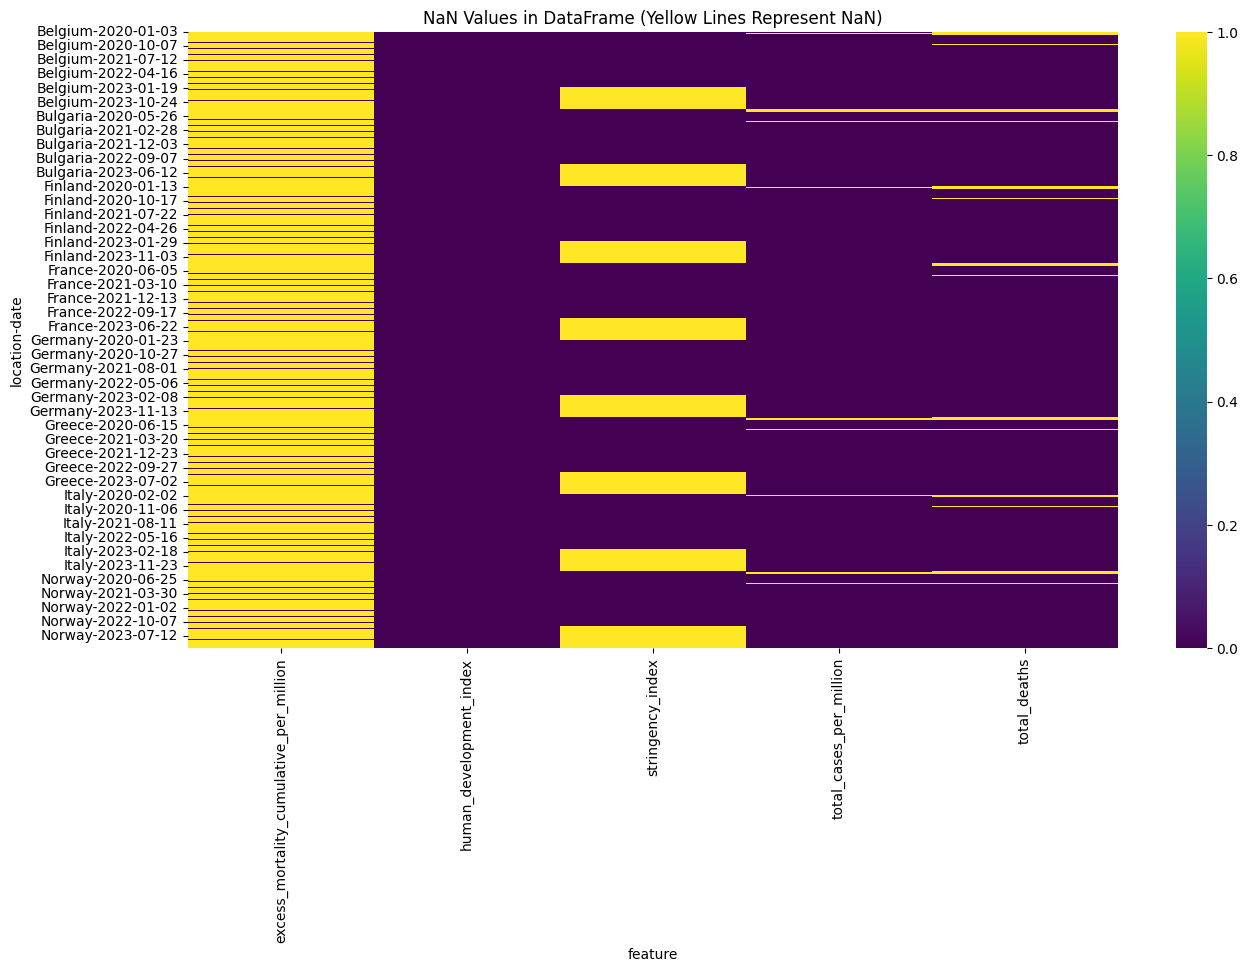

In [65]:
# Reshape the DataFrame using melt
melted_df = pd.melt(df_covid_europe_8countries_5features, id_vars=['iso_code', 'location', 'date'], var_name='feature')

# Display the NaN values count for each country and feature
nan_counts_by_country = (
    melted_df.groupby(['location', 'feature'])
    .apply(lambda x: x['value'].isnull().sum())
    .reset_index(name='nan_count')
)

# Print NaN counts for each country and feature
print("NaN values count for each country and feature:")
print(nan_counts_by_country)

# Visualize NaN values using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(melted_df.set_index(['location', 'date', 'feature'])['value'].isnull().unstack(), cmap='viridis')
plt.title('NaN Values in DataFrame (Yellow Lines Represent NaN)')
plt.show()


Drop excess mortality column and replace NaN from stringency_index by 0 as those values are missing because there were no measures taken anymore at the end of the pandemy for all the countries.
According to the total_cases_per_million feature, which is the one that varies a bit depending on the countries, we should remove the countries Bulgaria, Greece and Norway (which is ok because the ones left still represent well the diversity in Europe). 

3    Belgium                  total_cases_per_million         26

8   Bulgaria                  total_cases_per_million         58

13   Finland                  total_cases_per_million         20

18    France                  total_cases_per_million         13

23   Germany                  total_cases_per_million          0

28    Greece                  total_cases_per_million         50

33     Italy                  total_cases_per_million         20

38    Norway                  total_cases_per_million         39

But first, let's take a look at our other tables to make sure we don't keep countries with few values for economic features.

In [66]:
# Remove 'excess_mortality_cumulative_per_million' column
df_covid_europe_8countries_4features = df_covid_europe_8countries_5features.drop('excess_mortality_cumulative_per_million', axis=1)

# Replace NaN values in 'stringency_index' with 0
df_covid_europe_8countries_4features['stringency_index'] = df_covid_europe_8countries_4features['stringency_index'].fillna(0)

df_covid_europe_8countries_4features

,iso_code,location,date,total_deaths,stringency_index,total_cases_per_million,human_development_index
32006,BEL,Belgium,2020-01-03,NaN,0.0,0.086,0.931
32007,BEL,Belgium,2020-01-04,NaN,0.0,0.086,0.931
32008,BEL,Belgium,2020-01-05,NaN,0.0,0.086,0.931
32009,BEL,Belgium,2020-01-06,NaN,0.0,0.086,0.931
32010,BEL,Belgium,2020-01-07,NaN,0.0,0.086,0.931
...,...,...,...,...,...,...,...
255643,NOR,Norway,2024-03-01,5732.0,0.0,277245.339,0.957
255644,NOR,Norway,2024-03-02,5732.0,0.0,277245.339,0.957
255645,NOR,Norway,2024-03-03,5732.0,0.0,277245.339,0.957
255646,NOR,Norway,2024-03-04,5732.0,0.0,277245.339,0.957


**Exploration inflation tables**

In [67]:
# List of dataframes
df_list_HICP = [df_HICP_FR, df_HICP_BE, df_HICP_BU_21, df_HICP_FI, df_HICP_GR]
df_list_HICP_nrj = [df_HICP_food_europe, df_HICP_nrj_BU, df_HICP_nrj_GE, df_HICP_nrj_GR, df_HICP_nrj_IT]


# Loop through each dataframe
for df in df_list_HICP:
    # Apply string operations to the first column
    df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: str(x).replace("'", "").replace("*","").replace("Sept", "Sep").replace('2018', '18').replace('2019', '19').replace('2020', '20').replace('2021', '21').replace('2022', '22').replace('2023', '23'))
    # Rename the second column to 'HICP'
    df.rename(columns={df.columns[1]: 'HICP'}, inplace=True)
    # Drop the third and fourth columns if they exist
    if len(df.columns) > 2:
        df.drop(df.columns[2:], axis=1, inplace=True)

In [68]:
for df in df_list_HICP:
    # Apply string operations to the first column
    df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: str(x).replace("Sep22", "Sep 22").replace("Oct22","Oct 22").replace("Nov22", "Nov 22").replace('Dec22', 'Dec 22').replace('Jan23', 'Jan 23').replace('Feb23', 'Feb 23').replace('Mar23', 'Mar 23').replace('Apr23', 'Apr 23').replace('May23', 'May 23').replace('Jun23', 'Jun 23'))


In [69]:
# List of location values corresponding to each dataframe
locations = ['France', 'Belgium', 'Bulgaria', 'Finland', 'Greece']

# Loop through each dataframe and add a new column called 'location'
for i, df in enumerate(df_list_HICP):
    df['location'] = locations[i]

In [70]:
# Display the updated dataframes
for i, df in enumerate(df_list_HICP):
    print(f"DataFrame {i+1}:")
    print(df)
    print()

DataFrame 1:
     Month    HICP location
0   Jan 18  102.06   France
1   Feb 18  102.05   France
2   Mar 18  103.22   France
3   Apr 18  103.43   France
4   May 18  103.92   France
..     ...     ...      ...
65  Jun 23  120.71   France
66  Jul 23  120.77   France
67  Aug 23  122.10   France
68  Sep 23  121.40   France
69  Oct 23  121.61   France

[70 rows x 3 columns]

DataFrame 2:
     Month  HICP location
0   Jan 18   1.8  Belgium
1   Feb 18   1.5  Belgium
2   Mar 18   1.5  Belgium
3   Apr 18   1.6  Belgium
4   May 18   2.3  Belgium
..     ...   ...      ...
63  May 23   2.7  Belgium
64  Jun 23   1.6  Belgium
65  Jul 23   1.7  Belgium
66  Aug 23   2.4  Belgium
67  Sep 23   0.7  Belgium

[68 rows x 3 columns]

DataFrame 3:
     Month  HICP  location
0   Jan 18  -0.3  Bulgaria
1   Feb 18   0.2  Bulgaria
2   Mar 18   0.8  Bulgaria
3   Apr 18   2.0  Bulgaria
4   May 18   2.3  Bulgaria
5   Jun 18   2.4  Bulgaria
6   Jul 18   2.2  Bulgaria
7   Aug 18   2.5  Bulgaria
8   Sep 18   4.0  Bulg

In [71]:
# Merge the dataframes into one dataframe
merged_df_inflation = pd.concat(df_list_HICP, ignore_index=True)

print(merged_df_inflation)

      Month    HICP location
0    Jan 18  102.06   France
1    Feb 18  102.05   France
2    Mar 18  103.22   France
3    Apr 18  103.43   France
4    May 18  103.92   France
..      ...     ...      ...
200  Sep 18    1.10   Greece
201  Oct 18    1.80   Greece
202  Nov 18    1.10   Greece
203  Dec 18    0.60   Greece
204  Jan 19    0.40   Greece

[205 rows x 3 columns]


In [72]:
# Loop through each dataframe
for df in df_list_HICP_nrj:
    # Apply string operations to the first column
    df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: str(x).replace("'", "").replace("*","").replace("Sept", "Sep").replace('2018', '18').replace('2019', '19').replace('2020', '20').replace('2021', '21').replace('2022', '22').replace('2023', '23'))
    # Rename the second column to 'HICP'
    df.rename(columns={df.columns[1]: 'HICP'}, inplace=True)
    # Drop the third and fourth columns if they exist
    if len(df.columns) > 2:
        df.drop(df.columns[2:], axis=1, inplace=True)

In [73]:
for df in df_list_HICP_nrj:
    # Apply string operations to the first column
    df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: str(x).replace("Sep22", "Sep 22").replace("Oct22","Oct 22").replace("Nov22", "Nov 22").replace('Dec22', 'Dec 22').replace('Jan23', 'Jan 23').replace('Feb23', 'Feb 23').replace('Mar23', 'Mar 23').replace('Apr23', 'Apr 23').replace('May23', 'May 23').replace('Jun23', 'Jun 23'))


In [74]:
locations_nrj = ['europe', 'Bulgaria', 'Germany', 'Greece', 'Italy']
# Loop through each dataframe and add a new column called 'location'
for i, df in enumerate(df_list_HICP_nrj):
    df['location'] = locations_nrj[i]

In [75]:
# Display the updated dataframes
for i, df in enumerate(df_list_HICP_nrj):
    print(f"DataFrame {i+1}:")
    print(df)
    print()

DataFrame 1:
     Month   HICP location
0   Jan 16   0.10   europe
1   Feb 16  -0.10   europe
2   Mar 15   0.00   europe
3   Apr 16  -0.10   europe
4   May 16  -0.10   europe
..     ...    ...      ...
89  Jun 23  13.81   europe
90  Jul 23  12.46   europe
91  Aug 23  10.68   europe
92  Sep 23   9.36   europe
93  Oct 23   7.59   europe

[94 rows x 3 columns]

DataFrame 2:
     Month  HICP  location
0   Jan 19   0.4  Bulgaria
1   Feb 19   1.7  Bulgaria
2   Mar 19   4.4  Bulgaria
3   Apr 19   4.8  Bulgaria
4   May 19   3.9  Bulgaria
5   Jun 19   1.2  Bulgaria
6   Jul 19   0.6  Bulgaria
7   Aug 19   0.1  Bulgaria
8   Sep 19  -0.8  Bulgaria
9   Oct 19  -2.6  Bulgaria
10  Nov 19  -0.5  Bulgaria
11  Dec 19   3.7  Bulgaria
12  Jan 20   5.8  Bulgaria
13  Feb 20   4.1  Bulgaria
14  Mar 20  -0.1  Bulgaria
15  Apr 20  -8.3  Bulgaria
16  May 20 -11.5  Bulgaria
17  Jun 20 -11.3  Bulgaria
18  Jul 20  -9.4  Bulgaria
19  Aug 20  -8.3  Bulgaria
20  Sep 20  -8.2  Bulgaria
21  Oct 20  -8.5  Bulgaria
22  N

In [76]:
# Merge the dataframes into one dataframe
merged_df_inflation_nrj = pd.concat(df_list_HICP_nrj, ignore_index=True)

print(merged_df_inflation_nrj)

      Month   HICP location
0    Jan 16    0.1   europe
1    Feb 16   -0.1   europe
2    Mar 15    0.0   europe
3    Apr 16   -0.1   europe
4    May 16   -0.1   europe
..      ...    ...      ...
300  Jan 23  197.0    Italy
301  Feb 23  188.2    Italy
302  Mar 23  171.4    Italy
303  Apr 23  170.1    Italy
304  May 23  167.8    Italy

[305 rows x 3 columns]


In [77]:
# Concatenate merged_df_inflation and merged_df_inflation_nrj
df_HICP = pd.concat([merged_df_inflation, merged_df_inflation_nrj], ignore_index=True)

# Print the concatenated dataframe
print(df_HICP)

      Month    HICP location
0    Jan 18  102.06   France
1    Feb 18  102.05   France
2    Mar 18  103.22   France
3    Apr 18  103.43   France
4    May 18  103.92   France
..      ...     ...      ...
505  Jan 23  197.00    Italy
506  Feb 23  188.20    Italy
507  Mar 23  171.40    Italy
508  Apr 23  170.10    Italy
509  May 23  167.80    Italy

[510 rows x 3 columns]


In [78]:
from sklearn.preprocessing import StandardScaler

# Separate the data for France, Finland, and Germany
df_standardize_special = df_HICP[df_HICP['location'].isin(['France', 'Finland', 'Germany'])].copy()

# Separate the data for other countries
df_standardize_others = df_HICP[~df_HICP['location'].isin(['France', 'Finland', 'Germany'])].copy()

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the 'HICP' column for France, Finland, and Germany
df_standardize_special.loc[:, 'HICP'] = scaler.fit_transform(df_standardize_special[['HICP']])

# Standardize the 'HICP' column for the other countries
df_standardize_others.loc[:, 'HICP'] = scaler.fit_transform(df_standardize_others[['HICP']])

# Concatenate the two dataframes back together
df_HICP_std = pd.concat([df_standardize_special, df_standardize_others])

# Sort the dataframe by index to maintain the original order
df_HICP_std = df_HICP_std.sort_index()

# Print the standardized dataframe
print(df_HICP_std)


      Month      HICP location
0    Jan 18 -0.714808   France
1    Feb 18 -0.715530   France
2    Mar 18 -0.631012   France
3    Apr 18 -0.615842   France
4    May 18 -0.580445   France
..      ...       ...      ...
505  Jan 23  2.773234    Italy
506  Feb 23  2.617355    Italy
507  Mar 23  2.319769    Italy
508  Apr 23  2.296742    Italy
509  May 23  2.256001    Italy

[510 rows x 3 columns]


**Merge inflation and covid**

In [79]:
df_HICP_std.rename(columns={'Month': 'date'}, inplace=True)

In [80]:
# Convert 'date' column in df_covid_europe_8countries_4features to datetime
df_covid_europe_8countries_4features['date'] = pd.to_datetime(df_covid_europe_8countries_4features['date'])

# Convert 'Month' column in df_HICP_std to datetime
df_HICP_std['date'] = pd.to_datetime(df_HICP_std['date'], format='%b %y')

In [81]:
df_covid_europe_8countries_4features

,iso_code,location,date,total_deaths,stringency_index,total_cases_per_million,human_development_index
32006,BEL,Belgium,2020-01-03,NaN,0.0,0.086,0.931
32007,BEL,Belgium,2020-01-04,NaN,0.0,0.086,0.931
32008,BEL,Belgium,2020-01-05,NaN,0.0,0.086,0.931
32009,BEL,Belgium,2020-01-06,NaN,0.0,0.086,0.931
32010,BEL,Belgium,2020-01-07,NaN,0.0,0.086,0.931
...,...,...,...,...,...,...,...
255643,NOR,Norway,2024-03-01,5732.0,0.0,277245.339,0.957
255644,NOR,Norway,2024-03-02,5732.0,0.0,277245.339,0.957
255645,NOR,Norway,2024-03-03,5732.0,0.0,277245.339,0.957
255646,NOR,Norway,2024-03-04,5732.0,0.0,277245.339,0.957


In [82]:
df_HICP_std

,date,HICP,location
0,2018-01-01,-0.714808,France
1,2018-02-01,-0.715530,France
2,2018-03-01,-0.631012,France
3,2018-04-01,-0.615842,France
4,2018-05-01,-0.580445,France
...,...,...,...
505,2023-01-01,2.773234,Italy
506,2023-02-01,2.617355,Italy
507,2023-03-01,2.319769,Italy
508,2023-04-01,2.296742,Italy


Remove missing values of covid table by setting 0 before may 2020 and the value before for NaN after may 2020

In [83]:

# Get the index of the rows where total_deaths is null until the specified date
missing_index = df_covid_europe_8countries_4features[(df_covid_europe_8countries_4features['total_deaths'].isnull()) & 
                                                     (df_covid_europe_8countries_4features['date'] <= '2020-05-03')].index

# Replace the missing values with 0 for the specified index
df_covid_europe_8countries_4features.loc[missing_index, 'total_deaths'] = 0

# Replace the missing values with the value of the day before it for the remaining rows
df_covid_europe_8countries_4features['total_deaths'] = df_covid_europe_8countries_4features['total_deaths'].fillna(method='ffill')

df_covid_europe_8countries_4features

/tmp/ipykernel_3861/3713270469.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_covid_europe_8countries_4features['total_deaths'] = df_covid_europe_8countries_4features['total_deaths'].fillna(method='ffill')


,iso_code,location,date,total_deaths,stringency_index,total_cases_per_million,human_development_index
32006,BEL,Belgium,2020-01-03,0.0,0.0,0.086,0.931
32007,BEL,Belgium,2020-01-04,0.0,0.0,0.086,0.931
32008,BEL,Belgium,2020-01-05,0.0,0.0,0.086,0.931
32009,BEL,Belgium,2020-01-06,0.0,0.0,0.086,0.931
32010,BEL,Belgium,2020-01-07,0.0,0.0,0.086,0.931
...,...,...,...,...,...,...,...
255643,NOR,Norway,2024-03-01,5732.0,0.0,277245.339,0.957
255644,NOR,Norway,2024-03-02,5732.0,0.0,277245.339,0.957
255645,NOR,Norway,2024-03-03,5732.0,0.0,277245.339,0.957
255646,NOR,Norway,2024-03-04,5732.0,0.0,277245.339,0.957


In [84]:

# Get the index of the rows where total_deaths is null until the specified date
missing_index = df_covid_europe_8countries_4features[(df_covid_europe_8countries_4features['total_cases_per_million'].isnull()) & 
                                                     (df_covid_europe_8countries_4features['date'] <= '2020-05-03')].index

# Replace the missing values with 0 for the specified index
df_covid_europe_8countries_4features.loc[missing_index, 'total_cases_per_million'] = 0

# Replace the missing values with the value of the day before it for the remaining rows
df_covid_europe_8countries_4features['total_cases_per_million'] = df_covid_europe_8countries_4features['total_cases_per_million'].fillna(method='ffill')



/tmp/ipykernel_3861/1107373949.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_covid_europe_8countries_4features['total_cases_per_million'] = df_covid_europe_8countries_4features['total_cases_per_million'].fillna(method='ffill')


**Merge covid and inflation**

In [85]:
# Step 1: Aggregate COVID data by month, taking the median value for numeric features
numeric_columns = ['total_deaths', 'stringency_index', 'total_cases_per_million', 'human_development_index']
df_covid_monthly = df_covid_europe_8countries_4features.groupby([pd.Grouper(key='date', freq='ME'), 'location'])[numeric_columns].median().reset_index()

In [86]:
# Step 2: Convert 'date' column to month and year
df_HICP_std['date'] = df_HICP_std['date'].dt.to_period('M')
df_covid_monthly['date'] = df_covid_monthly['date'].dt.to_period('M')

# Step 3: Merge aggregated COVID data with inflation data based on 'location' and 'date' (month and year)
df_covid_HICP = pd.merge(df_HICP_std, df_covid_monthly, on=['location', 'date'], how='inner')

df_covid_HICP

,date,HICP,location,total_deaths,stringency_index,total_cases_per_million,human_development_index
0,2020-01,-0.485091,France,0.0,0.00,0.248,0.901
1,2020-02,-0.482923,France,0.0,5.56,0.248,0.901
2,2020-03,-0.477867,France,713.0,56.94,0.248,0.901
3,2020-04,-0.479311,France,12062.0,87.96,0.248,0.901
4,2020-05,-0.467031,France,17992.0,76.85,77.878,0.901
...,...,...,...,...,...,...,...
292,2023-01,2.773234,Italy,186158.0,0.00,429911.498,0.892
293,2023-02,2.617355,Italy,189155.0,0.00,435336.171,0.892
294,2023-03,2.319769,Italy,188974.0,0.00,434980.482,0.892
295,2023-04,2.296742,Italy,189627.0,0.00,436544.082,0.892


In [87]:
# Select the countries of interest
selected_countries = ['Belgium', 'Finland', 'Italy', 'France', 'Germany']

df_covid_HICP = df_covid_HICP[df_covid_HICP['location'].isin(selected_countries)]

df_covid_HICP

,date,HICP,location,total_deaths,stringency_index,total_cases_per_million,human_development_index
0,2020-01,-0.485091,France,0.0,0.00,0.248,0.901
1,2020-02,-0.482923,France,0.0,5.56,0.248,0.901
2,2020-03,-0.477867,France,713.0,56.94,0.248,0.901
3,2020-04,-0.479311,France,12062.0,87.96,0.248,0.901
4,2020-05,-0.467031,France,17992.0,76.85,77.878,0.901
...,...,...,...,...,...,...,...
292,2023-01,2.773234,Italy,186158.0,0.00,429911.498,0.892
293,2023-02,2.617355,Italy,189155.0,0.00,435336.171,0.892
294,2023-03,2.319769,Italy,188974.0,0.00,434980.482,0.892
295,2023-04,2.296742,Italy,189627.0,0.00,436544.082,0.892


In [88]:
# Assuming merged_df is your merged DataFrame
df_covid_HICP.to_csv('df_covid_HICP.csv', index=False)


**Merge other economy tables**

In [89]:
# Read the dataframes
df_education = pd.read_csv('Data/Education-GDP.csv', delimiter=',')
df_GDP = pd.read_csv('Data/GDP.csv', delimiter=',')
df_gini = pd.read_csv('Data/gini.csv', delimiter=',')
df_poverty = pd.read_csv('Data/poverty-explorer.csv', delimiter=',')
df_trade = pd.read_csv('Data/trade.csv', delimiter=',')


selected_countries = ['Belgium', 'Finland', 'Italy', 'France', 'Germany']

# Define a function to perform the required transformations
def preprocess_dataframe(df):
    # Replace "Country" or "Entity" with "location"
    df.rename(columns={'Country': 'location', 'Entity': 'location'}, inplace=True)
    
    # Convert "Year" to datetime and rename it to "date"
    df['date'] = pd.to_datetime(df['Year'], format='%Y')
    df.drop(columns=['Year'], inplace=True)

    # Drop the "Code" column
    if 'Code' in df.columns:
        df.drop(columns=['Code'], inplace=True)

    # Select only rows concerning selected countries and after 2017
    df = df[(df['location'].isin(selected_countries)) & (df['date'].dt.year >= 2017)]
    
    return df

# Apply the preprocessing function to each DataFrame
df_education = preprocess_dataframe(df_education)
df_GDP = preprocess_dataframe(df_GDP)
df_gini = preprocess_dataframe(df_gini)
df_poverty = preprocess_dataframe(df_poverty)
df_trade = preprocess_dataframe(df_trade)



In [90]:
df_education.rename(columns={df_education.columns[1]: 'education'}, inplace=True)

In [91]:
df_GDP.rename(columns={df_GDP.columns[1]: 'GDP'}, inplace=True)
df_GDP.drop(columns=[df_GDP.columns[2]], inplace=True)
df_GDP = df_GDP[df_GDP['date'].dt.year <= 2022]

In [92]:
df_gini.rename(columns={df_gini.columns[1]: 'gini'}, inplace=True)

In [93]:
relevant_columns = ['location', 'date', 'Median income or consumption per day', 
                    'Threshold income or consumption per day marking the poorest decile', 
                    'Threshold income or consumption per day marking the richest decile']

df_poverty = df_poverty[relevant_columns].copy()

df_poverty.rename(columns={'Median income or consumption per day': 'median_income',
                                     'Threshold income or consumption per day marking the poorest decile': 'poorest_decile_threshold',
                                     'Threshold income or consumption per day marking the richest decile': 'richest_decile_threshold'},
                           inplace=True)

In [94]:
df_trade.rename(columns={df_trade.columns[1]: 'trade'}, inplace=True)
df_trade

,location,trade,date
733,Belgium,165.325840,2017-01-01
734,Belgium,166.494780,2018-01-01
735,Belgium,164.176910,2019-01-01
736,Belgium,157.180730,2020-01-01
737,Belgium,172.674450,2021-01-01
3016,Finland,75.053140,2017-01-01
3017,Finland,78.192170,2018-01-01
3018,Finland,79.605430,2019-01-01
3019,Finland,71.634120,2020-01-01
3020,Finland,78.604590,2021-01-01


In [95]:
# Merge df_education with df_GDP
merged_df = df_education.merge(df_GDP, on=['location', 'date'], how='outer')

# Merge the result with df_gini
merged_df = merged_df.merge(df_gini, on=['location', 'date'], how='outer')

# Merge the result with df_poverty
merged_df = merged_df.merge(df_poverty, on=['location', 'date'], how='outer')

# Merge the result with df_trade
df_economics = merged_df.merge(df_trade, on=['location', 'date'], how='outer')

df_economics


,location,education,date,GDP,gini,median_income,poorest_decile_threshold,richest_decile_threshold,trade
0,Belgium,6.425340,2017-01-01,1.620,0.273880,50.106460,25.195316,89.483215,165.325840
1,Belgium,6.381070,2018-01-01,1.793,0.272144,51.246574,26.038218,90.039635,166.494780
2,Belgium,6.333970,2019-01-01,2.262,0.272198,52.628468,27.698778,93.140700,164.176910
3,Belgium,6.812330,2020-01-01,-5.363,0.259583,53.040030,28.693867,91.954960,157.180730
4,Belgium,6.234233,2021-01-01,6.286,NaN,NaN,NaN,NaN,172.674450
5,Belgium,NaN,2022-01-01,3.248,NaN,NaN,NaN,NaN,NaN
6,Finland,6.363110,2017-01-01,3.192,0.273831,49.616215,28.033659,90.452280,75.053140
7,Finland,6.275580,2018-01-01,1.140,0.273298,50.388140,28.374876,91.765030,78.192170
8,Finland,6.416950,2019-01-01,1.224,0.277373,51.262200,28.351320,92.979256,79.605430
9,Finland,6.634940,2020-01-01,-2.355,0.270912,51.208990,29.307734,92.387900,71.634120


**merge df_econommics with df_covid_HICP**

In [96]:
df_covid_HICP

,date,HICP,location,total_deaths,stringency_index,total_cases_per_million,human_development_index
0,2020-01,-0.485091,France,0.0,0.00,0.248,0.901
1,2020-02,-0.482923,France,0.0,5.56,0.248,0.901
2,2020-03,-0.477867,France,713.0,56.94,0.248,0.901
3,2020-04,-0.479311,France,12062.0,87.96,0.248,0.901
4,2020-05,-0.467031,France,17992.0,76.85,77.878,0.901
...,...,...,...,...,...,...,...
292,2023-01,2.773234,Italy,186158.0,0.00,429911.498,0.892
293,2023-02,2.617355,Italy,189155.0,0.00,435336.171,0.892
294,2023-03,2.319769,Italy,188974.0,0.00,434980.482,0.892
295,2023-04,2.296742,Italy,189627.0,0.00,436544.082,0.892


In [97]:
# Extract month and year from 'date' column
df_economics['date'] = df_economics['date'].dt.to_period('M')